<a href="https://colab.research.google.com/github/Swanand58/intro-to-information-retrieval/blob/main/Homework3IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

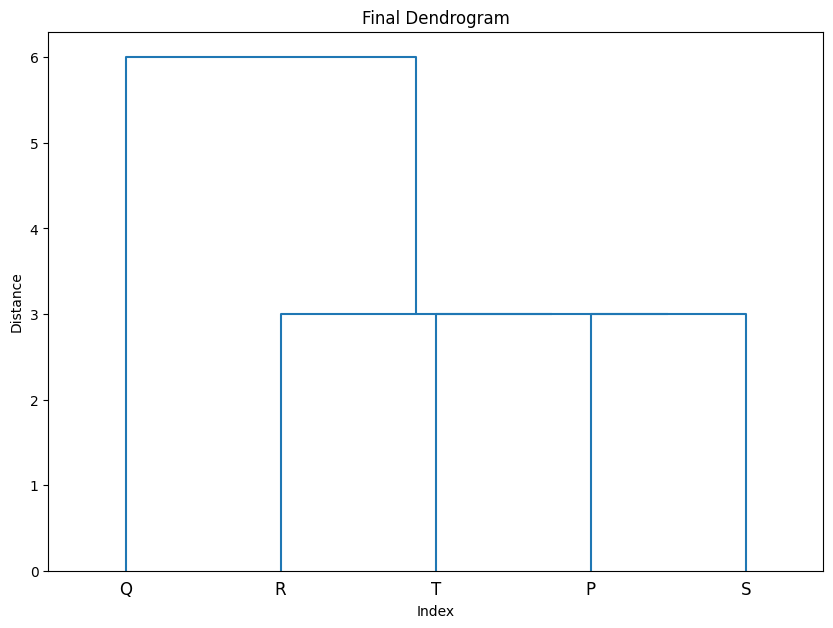

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, cosine
import matplotlib.pyplot as plt

matrix = [
    [0, 7, 5, 3, 3],
    [7, 0, 9, 11, 6],
    [5, 9, 0, 11, 3],
    [3, 11, 11, 0, 7],
    [3, 6, 3, 7, 0]
]

dists = squareform(matrix)

labels = ['P', 'Q', 'R', 'S', 'T']

Z = linkage(dists, 'single')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=labels, color_threshold=0)
plt.title('Final Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

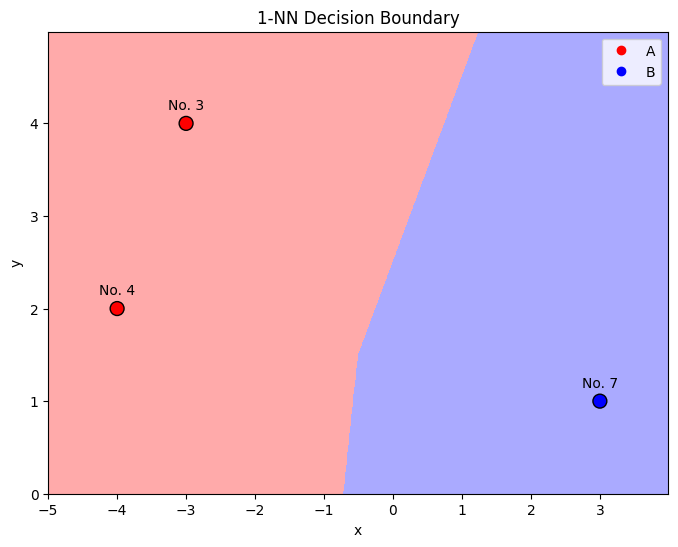

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X_train = np.array([[-3, 4], [-4, 2], [3, 1]])
y_train = np.array(['A', 'A', 'B'])


def encode_labels(labels):
    unique_labels = np.unique(labels)
    label_mapping = dict(zip(unique_labels, range(len(unique_labels))))
    return np.vectorize(label_mapping.get)(labels), label_mapping


y_train_encoded, label_mapping = encode_labels(y_train)


clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train_encoded)


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)


scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, cmap=cmap_bold, edgecolor='k', s=100)
plt.legend(handles=scatter.legend_elements()[0], labels=label_mapping.keys())


for i, label in enumerate(['No. 3', 'No. 4', 'No. 7']):
    plt.annotate(label, (X_train[i, 0], X_train[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')


plt.title("1-NN Decision Boundary")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


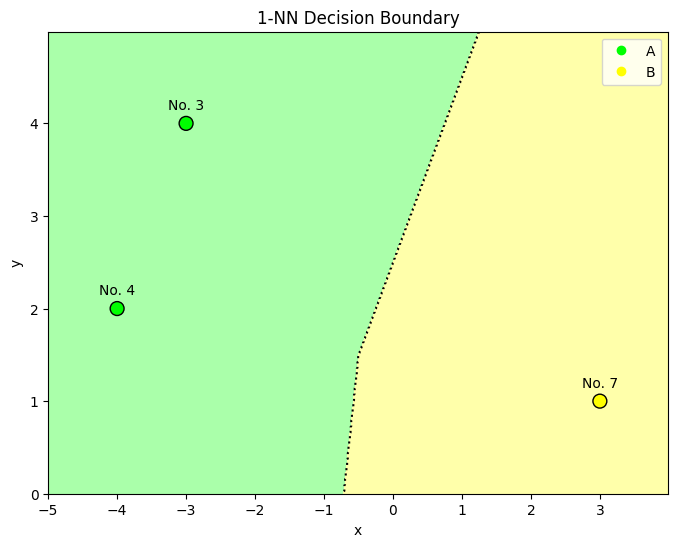

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X_train = np.array([[-3, 4], [-4, 2], [3, 1]])
y_train = np.array(['A', 'A', 'B'])


def encode_labels(labels):
    unique_labels = np.unique(labels)
    label_mapping = dict(zip(unique_labels, range(len(unique_labels))))
    return np.vectorize(label_mapping.get)(labels), label_mapping

y_train_encoded, label_mapping = encode_labels(y_train)


clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train_encoded)


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cmap_light = ListedColormap(['#AAFFAA', '#FFFFAA'])
cmap_bold = ListedColormap(['#00FF00', '#FFFF00'])


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.contour(xx, yy, Z, colors='k', linestyles='dotted', levels=[0.5])


scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, cmap=cmap_bold, edgecolor='k', s=100)
plt.legend(handles=scatter.legend_elements()[0], labels=label_mapping.keys())


for i, label in enumerate(['No. 3', 'No. 4', 'No. 7']):
    plt.annotate(label, (X_train[i, 0], X_train[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("1-NN Decision Boundary")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


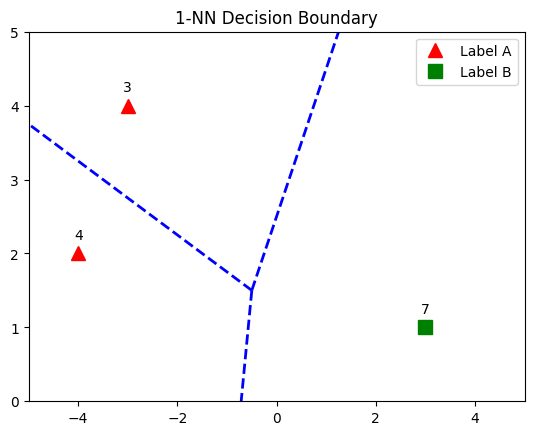

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d


instances = {
    3: (-3, 4, "A"),
    4: (-4, 2, "A"),
    7: (3, 1, "B")
}


points = np.array([value[:2] for key, value in instances.items()])
labels = np.array([value[2] for key, value in instances.items()])

vor = Voronoi(points)


fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='blue', line_width=2)


marker_styles = {'A': ('^', 'red'), 'B': ('s', 'green')}


legend_labels = {}


for i, point in enumerate(points):
    label = labels[i]
    instance_number = list(instances.keys())[i]
    marker, color = marker_styles[label]
    if label not in legend_labels:
        ax.plot(point[0], point[1], marker, color=color, label=f"Label {label}", markersize=10)
        legend_labels[label] = True
    else:
        ax.plot(point[0], point[1], marker, color=color, markersize=10)


    ax.annotate(f"{instance_number}", (point[0], point[1]),
                textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])


ax.legend()


plt.title("1-NN Decision Boundary")


plt.show()


In [ ]:
P_Cavity_Toothache = 0.04
P_Cavity_NoToothache = 0.01
P_NoCavity_Toothache = 0.06
P_NoCavity_NoToothache = 0.89

In [ ]:
P_Cavity = P_Cavity_Toothache + P_Cavity_NoToothache

print(P_Cavity)

0.05
